## LOAD DATA

In [14]:
import pandas as pd

df = pd.read_csv('DataCO2.csv')
df

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


## PREPROCESSING
- Trasformasi jika perlu

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [16]:
df.isnull().sum()

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
a = df.drop_duplicates()
a.duplicated().sum()

0

<Axes: >

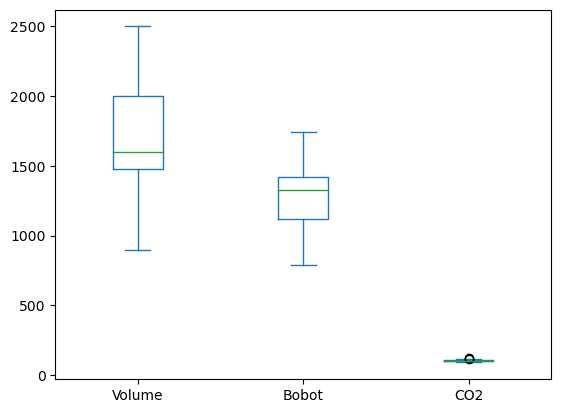

In [19]:
df.plot(kind = 'box')

- Terdapat outlier pada variabel CO2

In [20]:
import numpy as np

df['CO2 Log'] = np.log1p(df['CO2'])
df 

,Nama,Model,Volume,Bobot,CO2,CO2 Log
0,Toyoty,Aygo,1000,790,99,4.605170
1,Mitsubishi,Space Star,1200,1160,95,4.564348
2,Skoda,Citigo,1000,929,95,4.564348
3,Fiat,500,900,865,90,4.510860
4,Mini,Cooper,1500,1140,105,4.663439
5,VW,Up!,1000,929,105,4.663439
6,Skoda,Fabia,1400,1109,90,4.510860
7,Mercedes,A-Class,1500,1365,92,4.532599
8,Ford,Fiesta,1500,1112,98,4.595120
9,Audi,A1,1600,1150,99,4.605170


In [28]:
# Mengubah Tipe Data

from sklearn.preprocessing import LabelEncoder

# Inisialisasi label encoder
label_encoder = LabelEncoder()
df['Nama']= label_encoder.fit_transform(df['Nama'])
df['Model']= label_encoder.fit_transform(df['Model'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nama     36 non-null     int64  
 1   Model    36 non-null     int64  
 2   Volume   36 non-null     int64  
 3   Bobot    36 non-null     int64  
 4   CO2      36 non-null     int64  
 5   CO2 Log  36 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.8 KB


## MEMBUAT MULTIVARIABLE REGRESSION
- Memprediksi `CO2` dan menjadikannya sebagai variabel independen

MSE: 52.322793128940226
RMSE: 7.233449600912432
MAE: 5.992362265279091
R-squared: 0.3958761031477225


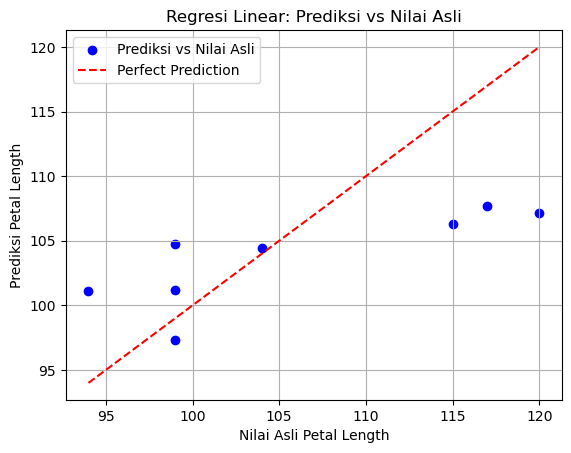

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = df[['Model', 'Volume', 'Bobot']]
y = df[['CO2']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

prediksi_y = model.predict(x_test)

mse = mean_squared_error(y_test, prediksi_y)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, prediksi_y)
r2 = r2_score(y_test, prediksi_y)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Plot hasil prediksi vs nilai asli

plt.scatter(y_test, prediksi_y, color='blue', label='Prediksi vs Nilai Asli')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', label='Perfect Prediction')
plt.xlabel('Nilai Asli Petal Length')
plt.ylabel('Prediksi Petal Length')
plt.title('Regresi Linear: Prediksi vs Nilai Asli')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO\.conda\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


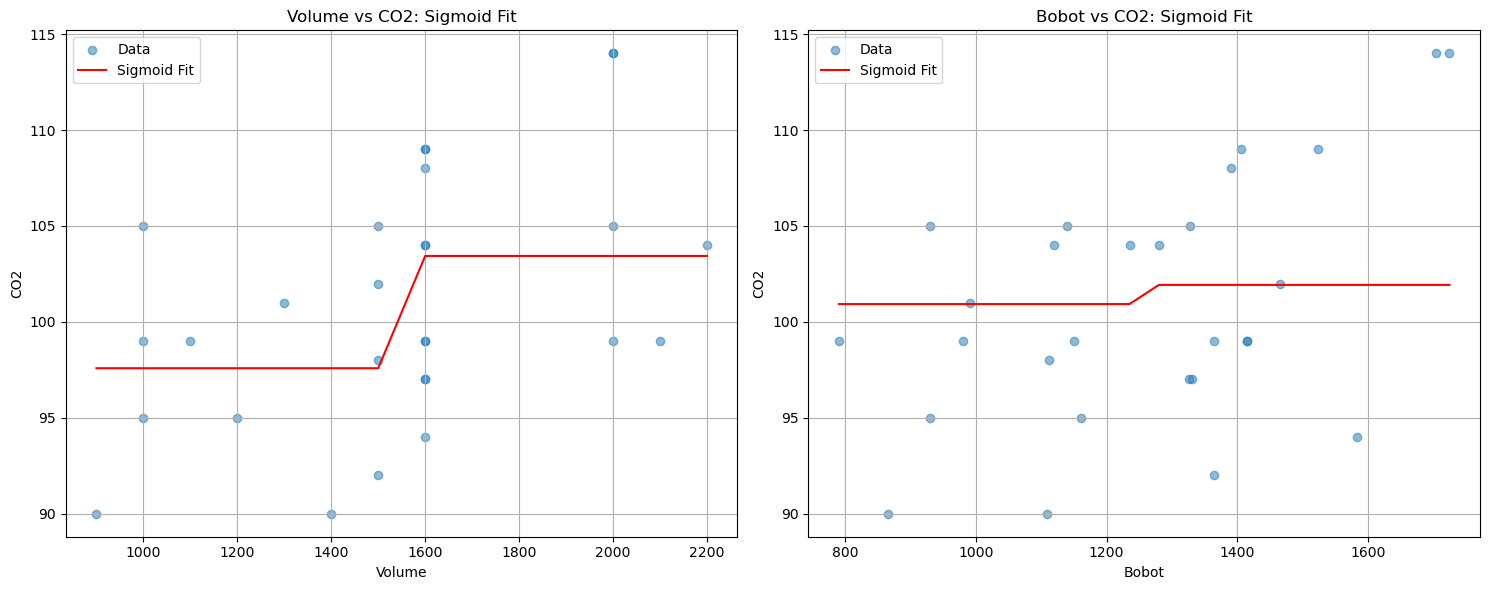


Parameter Sigmoid untuk Volume:
a (amplitude): 5.8542
b (steepness): 1.0000
c (x-offset): 1542.8571
d (y-offset): 97.5833

Parameter Sigmoid untuk Bobot:
a (amplitude): 1.0000
b (steepness): 1.0000
c (x-offset): 1254.6071
d (y-offset): 100.9286

Root Mean Squared Error (RMSE):
Volume - Sigmoid: 5.5577
Bobot - Sigmoid: 6.1491


In [33]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fungsi Sigmoid
def sigmoid(x, a, b, c, d):
    """
    a: amplitude
    b: steepness
    c: x-offset
    d: y-offset
    """
    return a / (1 + np.exp(-b * (x - c))) + d

# Persiapan data
X = df[['Volume', 'Bobot']]
y = df['CO2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot untuk Volume dan Bobot
plt.figure(figsize=(15, 6))

# Plot untuk Volume
plt.subplot(1, 2, 1)
sort_idx = np.argsort(X_train['Volume'])
x_volume = X_train['Volume'].values[sort_idx]
y_volume = y_train.values[sort_idx]

# Fit sigmoid untuk Volume
popt_sigmoid_vol, _ = curve_fit(sigmoid, x_volume, y_volume, p0=[1, 1, np.mean(x_volume), np.mean(y_volume)])
y_sigmoid_vol = sigmoid(x_volume, *popt_sigmoid_vol)

plt.scatter(x_volume, y_volume, alpha=0.5, label='Data')
plt.plot(x_volume, y_sigmoid_vol, 'r-', label='Sigmoid Fit')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('Volume vs CO2: Sigmoid Fit')
plt.legend()
plt.grid(True)

# Plot untuk Bobot
plt.subplot(1, 2, 2)
sort_idx = np.argsort(X_train['Bobot'])
x_bobot = X_train['Bobot'].values[sort_idx]
y_bobot = y_train.values[sort_idx]

# Fit sigmoid untuk Bobot
popt_sigmoid_bobot, _ = curve_fit(sigmoid, x_bobot, y_bobot, p0=[1, 1, np.mean(x_bobot), np.mean(y_bobot)])
y_sigmoid_bobot = sigmoid(x_bobot, *popt_sigmoid_bobot)

plt.scatter(x_bobot, y_bobot, alpha=0.5, label='Data')
plt.plot(x_bobot, y_sigmoid_bobot, 'r-', label='Sigmoid Fit')
plt.xlabel('Bobot')
plt.ylabel('CO2')
plt.title('Bobot vs CO2: Sigmoid Fit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print parameter hasil fitting sigmoid
print("\nParameter Sigmoid untuk Volume:")
print(f"a (amplitude): {popt_sigmoid_vol[0]:.4f}")
print(f"b (steepness): {popt_sigmoid_vol[1]:.4f}")
print(f"c (x-offset): {popt_sigmoid_vol[2]:.4f}")
print(f"d (y-offset): {popt_sigmoid_vol[3]:.4f}")

print("\nParameter Sigmoid untuk Bobot:")
print(f"a (amplitude): {popt_sigmoid_bobot[0]:.4f}")
print(f"b (steepness): {popt_sigmoid_bobot[1]:.4f}")
print(f"c (x-offset): {popt_sigmoid_bobot[2]:.4f}")
print(f"d (y-offset): {popt_sigmoid_bobot[3]:.4f}")

# Hitung RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_sigmoid_vol = calculate_rmse(y_volume, y_sigmoid_vol)
rmse_sigmoid_bobot = calculate_rmse(y_bobot, y_sigmoid_bobot)

print("\nRoot Mean Squared Error (RMSE):")
print(f"Volume - Sigmoid: {rmse_sigmoid_vol:.4f}")
print(f"Bobot - Sigmoid: {rmse_sigmoid_bobot:.4f}")

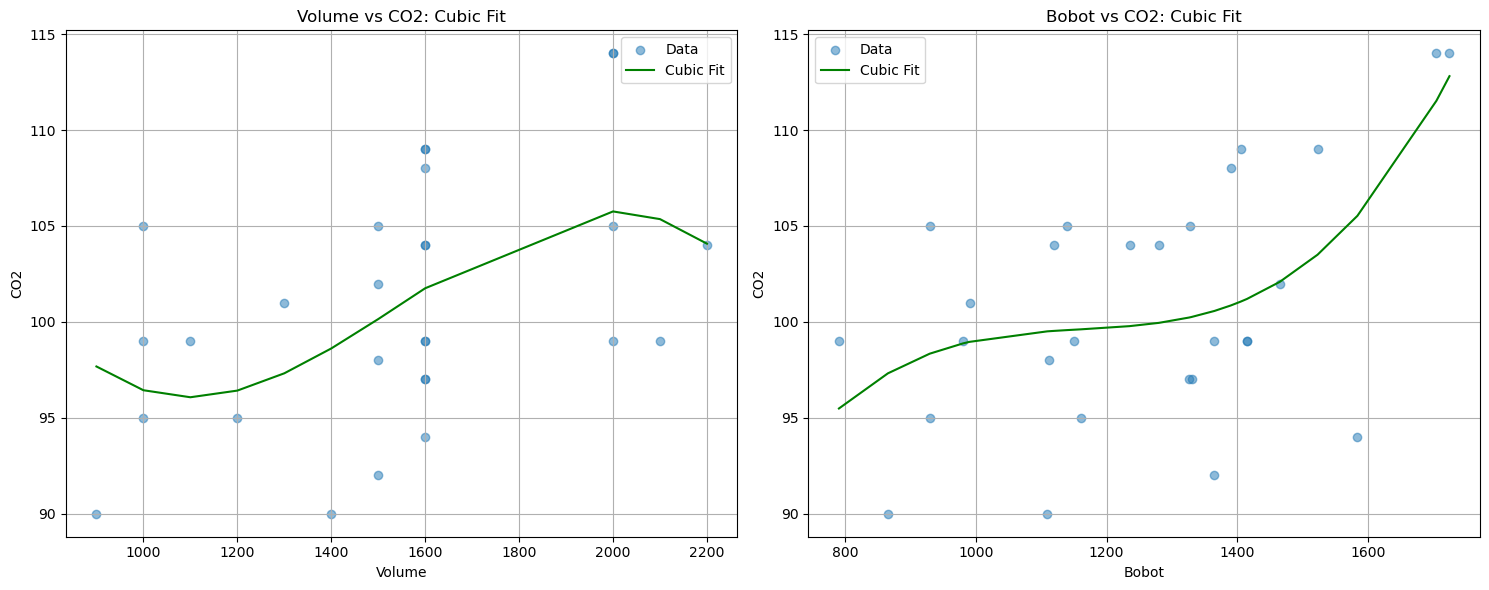


Parameter Cubic untuk Volume:
a (cubic): -0.0000
b (quadratic): 0.0001
c (linear): -0.1746
d (constant): 174.3653

Parameter Cubic untuk Bobot:
a (cubic): 0.0000
b (quadratic): -0.0002
c (linear): 0.2748
d (constant): -8.1408

Root Mean Squared Error (RMSE):
Volume - Cubic: 5.4587
Bobot - Cubic: 5.1326


In [34]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fungsi Cubic
def cubic(x, a, b, c, d):
    """
    a: cubic coefficient
    b: quadratic coefficient
    c: linear coefficient
    d: constant/intercept
    """
    return a * x**3 + b * x**2 + c * x + d

# Persiapan data
X = df[['Volume', 'Bobot']]
y = df['CO2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot untuk Volume dan Bobot
plt.figure(figsize=(15, 6))

# Plot untuk Volume
plt.subplot(1, 2, 1)
sort_idx = np.argsort(X_train['Volume'])
x_volume = X_train['Volume'].values[sort_idx]
y_volume = y_train.values[sort_idx]

# Fit cubic untuk Volume
popt_cubic_vol, _ = curve_fit(cubic, x_volume, y_volume)
y_cubic_vol = cubic(x_volume, *popt_cubic_vol)

plt.scatter(x_volume, y_volume, alpha=0.5, label='Data')
plt.plot(x_volume, y_cubic_vol, 'g-', label='Cubic Fit')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.title('Volume vs CO2: Cubic Fit')
plt.legend()
plt.grid(True)

# Plot untuk Bobot
plt.subplot(1, 2, 2)
sort_idx = np.argsort(X_train['Bobot'])
x_bobot = X_train['Bobot'].values[sort_idx]
y_bobot = y_train.values[sort_idx]

# Fit cubic untuk Bobot
popt_cubic_bobot, _ = curve_fit(cubic, x_bobot, y_bobot)
y_cubic_bobot = cubic(x_bobot, *popt_cubic_bobot)

plt.scatter(x_bobot, y_bobot, alpha=0.5, label='Data')
plt.plot(x_bobot, y_cubic_bobot, 'g-', label='Cubic Fit')
plt.xlabel('Bobot')
plt.ylabel('CO2')
plt.title('Bobot vs CO2: Cubic Fit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print parameter hasil fitting cubic
print("\nParameter Cubic untuk Volume:")
print(f"a (cubic): {popt_cubic_vol[0]:.4f}")
print(f"b (quadratic): {popt_cubic_vol[1]:.4f}")
print(f"c (linear): {popt_cubic_vol[2]:.4f}")
print(f"d (constant): {popt_cubic_vol[3]:.4f}")

print("\nParameter Cubic untuk Bobot:")
print(f"a (cubic): {popt_cubic_bobot[0]:.4f}")
print(f"b (quadratic): {popt_cubic_bobot[1]:.4f}")
print(f"c (linear): {popt_cubic_bobot[2]:.4f}")
print(f"d (constant): {popt_cubic_bobot[3]:.4f}")

# Hitung RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_cubic_vol = calculate_rmse(y_volume, y_cubic_vol)
rmse_cubic_bobot = calculate_rmse(y_bobot, y_cubic_bobot)

print("\nRoot Mean Squared Error (RMSE):")
print(f"Volume - Cubic: {rmse_cubic_vol:.4f}")
print(f"Bobot - Cubic: {rmse_cubic_bobot:.4f}")